# Data Exploration

In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

## a)

In [3]:
# Read the CSV file
insurance_orig = pd.read_csv("insurance_orig.csv")

# Access the Shape of the DataFrame
rows, columns = insurance_orig.shape

# Print the shape
print(f"Rows: {rows}, Columns: {columns}")

Rows: 1349, Columns: 7


## b)

In [4]:
insurance_orig.describe()

,age,bmi,children,charges
count,1348.000000,1347.000000,1348.000000,1347.000000
mean,39.228487,30.655499,1.103858,13254.716622
std,14.063585,6.085427,1.217132,12096.109347
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.315000,0.000000,4742.306100
50%,39.000000,30.360000,1.000000,9377.904700
75%,51.000000,34.637500,2.000000,16582.138605
max,64.000000,53.130000,7.000000,63770.428010


## c)

In [5]:
insurance_orig_no_nan = insurance_orig.dropna().copy()
print("Row count:", len(insurance_orig_no_nan))

Row count: 1338


## d)

In [6]:
# Create BMI classes
bins = [0, 18.5, 25, 30, float('inf')]
labels = ['underweight', 'normal weight', 'overweight', 'obese']

# Insert new column 'bmi_class' based on the bins and labels
insurance_orig_no_nan['bmi_class'] = pd.cut(insurance_orig_no_nan['bmi'], bins=bins, labels=labels, right=False)

# Count number of patients in each class
print(insurance_orig_no_nan['bmi_class'].value_counts())

bmi_class
obese            707
overweight       386
normal weight    225
underweight       20
Name: count, dtype: int64


## e)

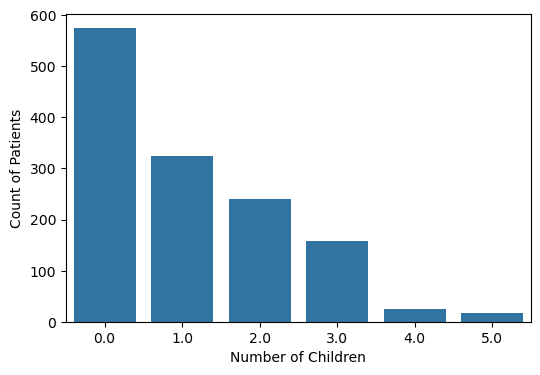

Mode of 'children': 0.0


In [7]:
plt.pyplot.figure(figsize=(6,4))
sns.countplot(x='children', data=insurance_orig_no_nan)
#plt.pyplot.title('Distribution of the Number of Children')
plt.pyplot.xlabel('Number of Children')
plt.pyplot.ylabel('Count of Patients')
plt.pyplot.show()

mode_value = insurance_orig_no_nan['children'].mode()[0]
print("Mode of 'children':", mode_value)


## f)

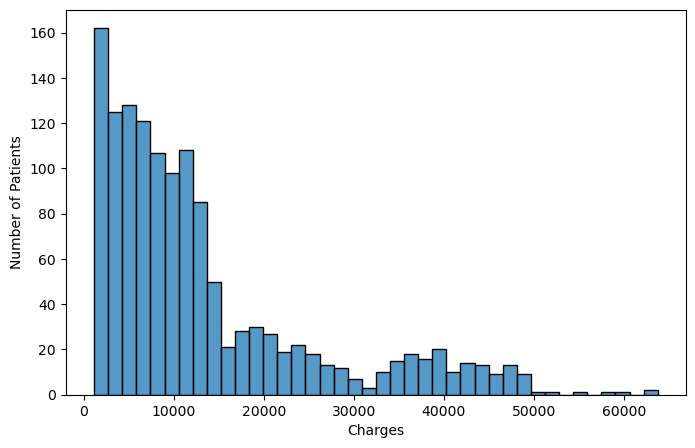

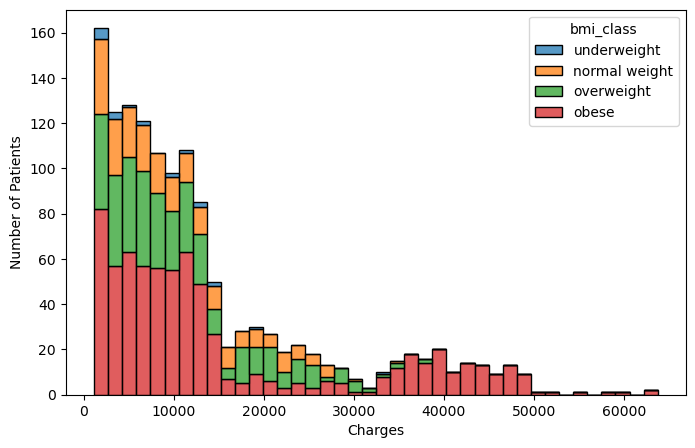

In [8]:
# Set figure size
plt.pyplot.figure(figsize=(8,5))

# Create histogram
sns.histplot(data=insurance_orig_no_nan, x='charges', bins=40)
#plt.pyplot.title('Distribution of Medical Charges')
plt.pyplot.xlabel('Charges')
plt.pyplot.ylabel('Number of Patients')
plt.pyplot.show()

plt.pyplot.figure(figsize=(8,5))

sns.histplot(data=insurance_orig_no_nan, 
             x='charges', 
             bins=40,
             hue='bmi_class',  # different colors per BMI class
             multiple='stack') # stack bars to show contribution of each BMI class

#plt.pyplot.title('Distribution of Medical Charges by BMI Class')
plt.pyplot.xlabel('Charges')
plt.pyplot.ylabel('Number of Patients')
plt.pyplot.show()

## g)

## h)

<Figure size 800x500 with 0 Axes>

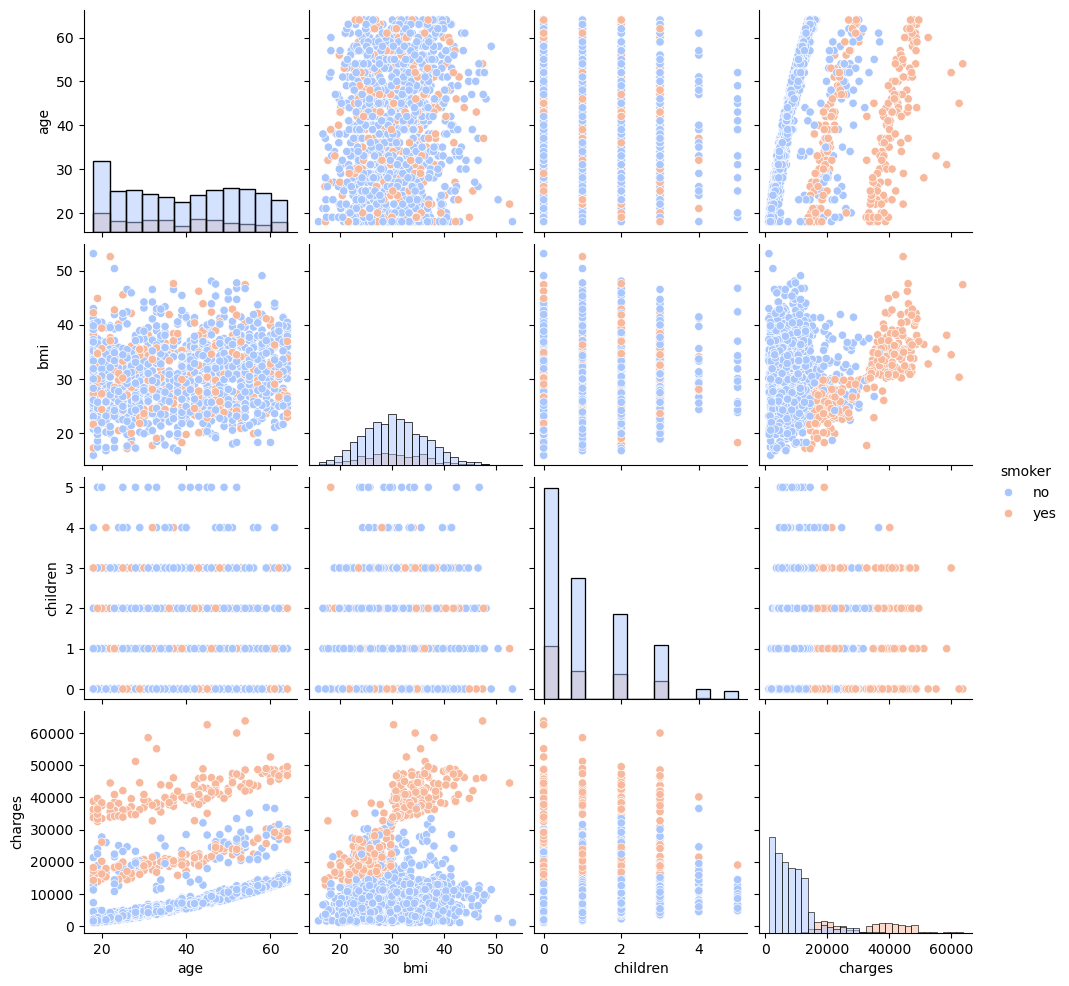

In [10]:
# Select numerical features + hue column
num_features = ['age', 'bmi', 'children', 'charges']

plt.pyplot.figure(figsize=(8,5))
sns.pairplot(
    insurance_orig_no_nan[num_features + ['smoker']],
    hue='smoker',
    diag_kind='hist',
    palette='coolwarm'
)

#plt.pyplot.suptitle('Pairplot of Numerical Features (Hue = Smoker)', y=1.02)
plt.pyplot.show()

## i)

In [11]:
# Select numerical columns
num_cols = ["age", "bmi", "children", "charges"]

# Compute correlation matrix
corr_matrix = insurance_orig_no_nan[num_cols].corr()

print("Correlation matrix:")
print(corr_matrix, "\n")

# Find strongest absolute correlation (excluding self-correlations)
corr_pairs = corr_matrix.unstack()
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
strongest_pair = corr_pairs.abs().idxmax()
strongest_value = corr_pairs[strongest_pair]

print(f"Strongest absolute correlation: {strongest_pair} = {strongest_value:.3f}")

Correlation matrix:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000 

Strongest absolute correlation: ('age', 'charges') = 0.299


## j)